In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Función para convertir un arreglo en un vector columna. La entrada x es una lista o un vector fila.
def col(x):
    return np.array(np.matrix(x)).T

# Punto 1

El cambio climático ha sido debatido por años, y una pieza central del debate ha sido su causa: ¿se debe al ciclo natural del sistema, o se debe a la actividad humana? Usted puede encontrar adjunto el reporte sobre cambio climático publicado en 2007 por si quiere entender mejor el contexto de este problema.

Adjunto puede encontrar los siguientes datos reales:
- *SunRad.txt*: **Radiación solar mensual** (kWh/m^2/día) en la ciudad de Columbus, Ohio, EUA (periodo 1961-1990).
- *Temp_CO2.txt*: **Anomalías de temperatura anual** (°C). Estas anomalías se calculan como la diferencia entre la temperatura observada y la temperatura estimada por un modelo (periodo: 1961-1990). Concentración anual de CO2 (ppm) medido en Mauna Loa Observatory, Hawaii (periodo: 1961-1990).

## a) Convierta los datos de radiación solar a un promedio anual

In [2]:
# Se exportan los datos del .txt. Primero se quita la primera fila (strings).
with open('Sun_Rad.txt') as f:
    lines = (line for line in f if not line.startswith('"'))
    srad = np.loadtxt(lines, skiprows=0)

# Extraer los datos de cada columna
year = srad[:, 0]
month = srad[:, 1]
sunrad = srad[:, 2]

# Lista para guardar los valores de cada mes
yr = []
# Lista para guardar el promedio de cada año
avgs = []

# Crear una lista con los datos de los 12 meses de cada año y agregar esa lista a una lista que guarda las listas de todos los años.
for i in range(0, len(sunrad), 12):
   yr.append(list(sunrad[i:i+12]))

# A cada lista (año) dentro de la lista de listas se le calcula el promedio.
for lista in yr:
    avgs.append(np.round(np.average(lista), 3))

promedios = pd.DataFrame(avgs, index=list(set([int(i) for i in year])), columns=["Promedio anual"])
promedios

,Promedio anual
61,4.083
62,4.125
63,4.567
64,4.408
65,4.325
66,4.200
67,4.183
68,4.317
69,4.217
70,4.233


## b) Grafique cada una de las tres señales contra el tiempo. Analice las gráficas. No se le olvide colocar las unidades de cada eje.

In [3]:
# Se exportan los datos del .txt de temperatura y CO2. Primero se quita la primera fila (strings).
with open('Temp_CO2.txt') as f:
    lines = (line for line in f if not line.startswith('"'))
    tempCO2 = np.loadtxt(lines, skiprows=0)

# Se separan los datos de temperatura y de concentración de CO2.
temp = tempCO2[:, 1]
co2 = tempCO2[:, 2]

Text(0, 0.5, 'Concentración de $CO_2$ [ppm]')

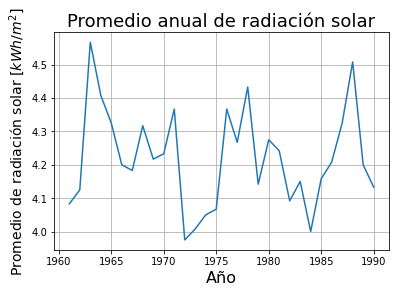

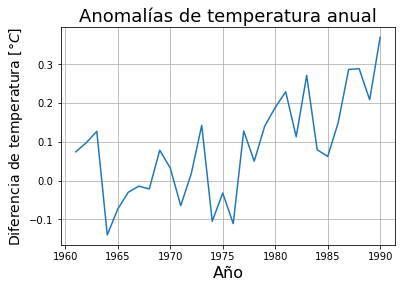

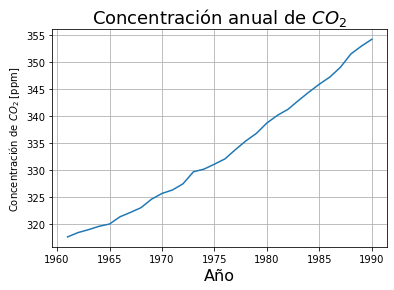

In [4]:
# Lista con los años a tener en cuenta
anios = [*range(1961, 1991, 1)]

plt.plot(anios, avgs)
plt.grid()
plt.title(r'Promedio anual de radiación solar', fontsize=18)
plt.xlabel(r'Año', fontsize=16)
plt.ylabel(r'Promedio de radiación solar $[kWh/m^2]$', fontsize=14)

plt.figure()
plt.plot(anios, temp)
plt.grid()
plt.title(r'Anomalías de temperatura anual', fontsize=18)
plt.xlabel(r'Año', fontsize=16)
plt.ylabel(r'Diferencia de temperatura $[°C]$', fontsize=14)

plt.figure()
plt.plot(anios, co2)
plt.grid()
plt.title(r'Concentración anual de $CO_2$', fontsize=18)
plt.xlabel(r'Año', fontsize=16)
plt.ylabel(r'Concentración de $CO_2$ [ppm]')

### De la gráfica del promedio anual de radiación solar se puede notar que los datos están muy dispersos y no parece haber una dependencia clara entre la radiación solar y el paso del tiempo. Los promedios de radiación solar están entre los $3.9 kWh/m^2$ y los $4.6 kWh/m^2$.

### La gráfica de anomalías de temperatura anual muestra un comportamiento sin una tendencia muy clara, pues hubo diferentes diferencias de temperatura para diferentes años. Sin embargo, se puede notar que los valores más altos de diferencia de temperatura se presentaron para los años más altos, es decir, para la década de 1980 en adelante.

### La gráfica de concentración de $\text{CO}_2$ muestra una clara relación directa entre el tiempo y la concentración del compuesto: a medida que los años avanzan, la concentración de $\text{CO}_2$ incrementa de igual forma con una tendencia prácticamente lineal.

## c) Grafique temperatura vs radiación solar, y grafique temperatura vs concentración de CO2.

Text(0, 0.5, 'Diferencia de temperatura $[°C]$')

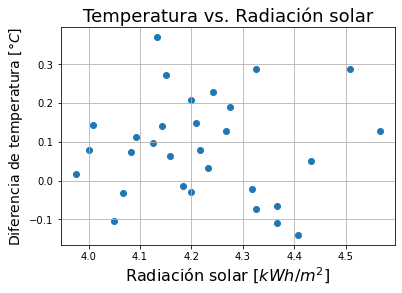

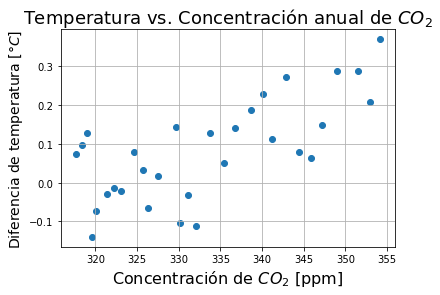

In [5]:
plt.scatter(avgs, temp)
plt.grid()
plt.title(r'Temperatura vs. Radiación solar', fontsize=18)
plt.xlabel(r'Radiación solar $[kWh/m^2]$', fontsize=16)
plt.ylabel(r'Diferencia de temperatura $[°C]$', fontsize=14)

plt.figure()
plt.scatter(co2, temp)
plt.grid()
plt.title(r'Temperatura vs. Concentración anual de $CO_2$', fontsize=18)
plt.xlabel(r'Concentración de $CO_2$ [ppm]', fontsize=16)
plt.ylabel(r'Diferencia de temperatura $[°C]$', fontsize=14)

## d) Utilizando la estimación ML de la matriz de covarianza, estime el coeficiente de correlación entre las parejas de variables: (temperatura, radiación solar), y (temperatura, concentración de CO2). Analice estos resultados y los obtenidos en a)- c). **No puede utilizar funciones predefinidas para hacer estas estimaciones**. Recuerde que un estimador de la matriz de covarianza está dado por la ecuación
## $$\hat{Q} = \frac{1}{M-1}\sum_{i=1}^{M}(x_i - \mu)(x_i - \mu)^T$$
## donde $x, \mu \in \mathbb{R}^n$ y $\mu$ es la estimación del vector de valores esperados dada por la ecuación
## $$\mu = \frac{1}{M}\sum_{i=1}^{M}x_i$$

In [6]:
# Primero hacemos la estimación de Q y mu para la pareja temperatura, radiación solar.

# Creamos vectores de la forma v = [T, R]^T donde T es temperatura y R es radiación solar. Los vamos a colocar en una matriz TR de 2x30.
TR = np.zeros((2, len(avgs)))
n, m = np.shape(TR)

# Llenamos la matriz
for i in range(m):
    TR[0, i] = temp[i]
    TR[1, i] = avgs[i]

# Creamos la estimación de la media mu
mu_TR = np.zeros((2,1))
for i in range(m):
    mu_TR = mu_TR + col(TR[:, i])
mu_TR = mu_TR/m
print(f'Estimación de la media mu_TR: \n {mu_TR}\n')

# Creamos la estimación de la matriz de covarianza
Q_TR = np.zeros((2,2))
for i in range(m):
    Q_TR = Q_TR + (col(TR[:,i])-mu_TR)@(col(TR[:,i])-mu_TR).T
Q_TR = Q_TR/(m-1)
print(f'Estimación de la matriz de covarianza Q_TR: \n {Q_TR}\n')

# Se calcula el coeficiente de correlación entre las variables
p_TR = (Q_TR[0,1])/(np.sqrt(Q_TR[0,0]*Q_TR[1,1]))
print(f'Coeficiente de correlación entre temperatura y radiación solar: \n p_TR = {np.round(p_TR, 4)}')


Estimación de la media mu_TR: 
 [[0.08499   ]
 [4.22083333]]

Estimación de la matriz de covarianza Q_TR: 
 [[ 0.01689071 -0.0002945 ]
 [-0.0002945   0.02204083]]

Coeficiente de correlación entre temperatura y radiación solar: 
 p_TR = -0.0153


In [7]:
# Ahora hacemos la estimación de Q y mu para la pareja temperatura, concentración de CO2.

# Creamos vectores de la forma v = [T, C]^T donde T es temperatura y C es concentración de CO2. Los vamos a colocar en una matriz TC de 2x30.
TC = np.zeros((2, len(temp)))
n1, m1 = np.shape(TC)

# Llenamos la matriz
for i in range(m1):
    TC[0, i] = temp[i]
    TC[1, i] = co2[i]

# Creamos la estimación de la media mu
mu_TC = np.zeros((2,1))
for i in range(m1):
    mu_TC = mu_TC + col(TC[:, i])
mu_TC = mu_TC/m1
print(f'Estimación de la media mu_TC: \n {mu_TC}\n')

# Creamos la estimación de la maTCiz de covarianza
Q_TC = np.zeros((2,2))
for i in range(m1):
    Q_TC = Q_TC + (col(TC[:,i])-mu_TC)@(col(TC[:,i])-mu_TC).T
Q_TC = Q_TC/(m1-1)
print(f'Estimación de la matriz de covarianza Q_TC: \n {Q_TC}\n')

# Se calcula el coeficiente de correlación entre las variables
p_TC = (Q_TC[0,1])/(np.sqrt(Q_TC[0,0]*Q_TC[1,1]))
print(f'Coeficiente de correlación entre temperatura y concentración de CO2: \n p_TC = {np.round(p_TC, 4)}')


Estimación de la media mu_TC: 
 [[8.49900000e-02]
 [3.33405667e+02]]

Estimación de la matriz de covarianza Q_TC: 
 [[1.68907127e-02 1.04706723e+00]
 [1.04706723e+00 1.29799963e+02]]

Coeficiente de correlación entre temperatura y concentración de CO2: 
 p_TC = 0.7072


### De la pareja (diferencia de temperatura, radiación solar) es claro a partir del coeficiente de correlación entre estas dos variables que estas son prácticamente no correlacionadas, pues el valor es muy cercano a cero. Esto reconfirma el resultado obtenido en la gráfica entre estas dos variables, en la que no se vio ningún tipo de relación entre las variables.

### De la pareja (diferencia de temperatura, concentración de $\text{CO}_2$) es claro a partir del coeficiente de correlación entre estas dos variables que estas son variables que están correlacionadas positivamente, pues el coeficiente de correlación obtenido es un valor cercano a 1 y positivo, lo que indica que hay una relación directamente proporcional entre las variables, lo que reconfirma lo que se pudo observar de la gráfica presentada en el literal anterior.

## e) Empezando por los primeros 10 años y terminando en los últimos 10 años, deslice una ventana de 10 años y estime el coeficiente de correlación de las parejas (temperatura, radiación solar), y (temperatura, concentración de CO2) para cada ventana. Como resultado usted debe obtener dos señales de correlación con 20 puntos cada una. Grafíquelas contra el tiempo. 

In [8]:
# Creamos una lista con los años.
years = list(set([int(i) for i in year]))

# Creamos listas para guardar los diferentes vectores correspondientes a cada ventana.
vent_anios = []
vent_temp = []
vent_srad = []
vent_co2 = []

# Se llena cada lista con las ventanas correspondientes.
for i in range(21):
    vent_anios.append(years[i:10+i])
    vent_temp.append(temp[i:10+i])
    vent_srad.append(avgs[i:10+i])
    vent_co2.append(co2[i:10+i])

### Primero hacemos el proceso para la pareja **(temperatura, radiación solar)**

In [9]:
# Para cada una de las ventanas calculamos media estimada, matriz de covarianza estimada y coeficiente de correlación.
k = 1 # Contador de ventanas
ps_TR = [] # Lista de coeficientes de correlación T-R

for i in range(len(vent_temp)):

    T = vent_temp[i]
    R = vent_srad[i]

    # Creamos vectores de la forma v = [T, R]^T donde T es temperatura y R es la radiación solar. Los vamos a colocar en una matriz TR_vent de 2x10.
    TR_vent = np.zeros((2,len(T)))
    f, c = np.shape(TR_vent)

    # Llenamos la matriz
    for j in range(c):
        TR_vent[0, j] = T[j]
        TR_vent[1, j] = R[j]

    # Creamos la estimación de la media mu
    muestim = np.zeros((2,1))
    for j in range(c):
        muestim = muestim + col(TR_vent[:, j])
    muestim = muestim/c
    print(f'\nEstimación de la media muestim: \n {muestim}\n')

    # Creamos la estimación de la maTCiz de covarianza
    Qestim = np.zeros((2,2))
    for j in range(c):
        Qestim = Qestim + (col(TR_vent[:,j])-muestim)@(col(TR_vent[:,j])-muestim).T
    Qestim = Qestim/(c-1)
    print(f'Estimación de la matriz de covarianza Qestim: \n {Qestim}\n')

    # Se calcula el coeficiente de correlación entre las variables
    p_ventana = (Qestim[0,1])/(np.sqrt(Qestim[0,0]*Qestim[1,1]))
    print(f'Coeficiente de correlación entre temperatura y radiación solar (ventana {k}): \n p_ventana = {np.round(p_ventana, 4)}\n')
    print('-----------------------------------------')
    ps_TR.append(np.round(p_ventana, 4))

    k+=1


Estimación de la media muestim: 
 [[0.01322]
 [4.2658 ]]

Estimación de la matriz de covarianza Qestim: 
 [[ 0.0070298  -0.00179665]
 [-0.00179665  0.02055018]]

Coeficiente de correlación entre temperatura y radiación solar (ventana 1): 
 p_ventana = -0.1495

-----------------------------------------

Estimación de la media muestim: 
 [[-6.6000e-04]
 [ 4.2942e+00]]

Estimación de la matriz de covarianza Qestim: 
 [[ 0.00706619 -0.00098566]
 [-0.00098566  0.01707907]]

Coeficiente de correlación entre temperatura y radiación solar (ventana 2): 
 p_ventana = -0.0897

-----------------------------------------

Estimación de la media muestim: 
 [[-0.00867]
 [ 4.2792 ]]

Estimación de la matriz de covarianza Qestim: 
 [[5.95342456e-03 7.90488889e-05]
 [7.90488889e-05 2.49690667e-02]]

Coeficiente de correlación entre temperatura y radiación solar (ventana 3): 
 p_ventana = 0.0065

-----------------------------------------

Estimación de la media muestim: 
 [[-0.0071]
 [ 4.2233]]

Estimaci

### Ahora hacemos el proceso para la pareja **(temperatura, concentración de $\text{CO}_2$)**

In [10]:
# Para cada una de las ventanas calculamos media estimada, matriz de covarianza estimada y coeficiente de correlación.
k = 1 # Contador de ventanas
ps_TC = [] # Lista de coeficientes de correlación T-C
for i in range(len(vent_temp)):

    T = vent_temp[i]
    C = vent_co2[i]

    # Creamos vectores de la forma v = [T, C]^T donde T es temperatura y C es la concentración de CO2. Los vamos a colocar en una matriz TC_vent de 2x10.
    TC_vent = np.zeros((2,len(T)))
    f, c = np.shape(TC_vent)

    # Llenamos la matriz
    for j in range(c):
        TC_vent[0, j] = T[j]
        TC_vent[1, j] = C[j]

    # Creamos la estimación de la media mu
    muestim = np.zeros((2,1))
    for j in range(c):
        muestim = muestim + col(TC_vent[:, j])
    muestim = muestim/c
    print(f'\nEstimación de la media muestim: \n {muestim}\n')

    # Creamos la estimación de la maTCiz de covarianza
    Qestim = np.zeros((2,2))
    for j in range(c):
        Qestim = Qestim + (col(TC_vent[:,j])-muestim)@(col(TC_vent[:,j])-muestim).T
    Qestim = Qestim/(c-1)
    print(f'Estimación de la matriz de covarianza Qestim: \n {Qestim}\n')

    # Se calcula el coeficiente de correlación entre las variables
    p_ventana = (Qestim[0,1])/(np.sqrt(Qestim[0,0]*Qestim[1,1]))
    print(f'Coeficiente de correlación entre temperatura y concentración de CO2 (ventana {k}): \n p_ventana = {np.round(p_ventana, 4)}\n')
    print('-----------------------------------------')
    ps_TC.append(np.round(p_ventana, 4))

    k+=1
        


Estimación de la media muestim: 
 [[1.32200e-02]
 [3.21163e+02]]

Estimación de la matriz de covarianza Qestim: 
 [[ 7.02979511e-03 -1.62509556e-02]
 [-1.62509556e-02  7.23455667e+00]]

Coeficiente de correlación entre temperatura y concentración de CO2 (ventana 1): 
 p_ventana = -0.0721

-----------------------------------------

Estimación de la media muestim: 
 [[-6.6000e-04]
 [ 3.2203e+02]]

Estimación de la matriz de covarianza Qestim: 
 [[ 7.06619156e-03 -2.33792222e-02]
 [-2.33792222e-02  7.98306667e+00]]

Coeficiente de correlación entre temperatura y concentración de CO2 (ventana 2): 
 p_ventana = -0.0984

-----------------------------------------

Estimación de la media muestim: 
 [[-8.67000e-03]
 [ 3.22931e+02]]

Estimación de la matriz de covarianza Qestim: 
 [[5.95342456e-03 3.49821889e-02]
 [3.49821889e-02 8.93312111e+00]]

Coeficiente de correlación entre temperatura y concentración de CO2 (ventana 3): 
 p_ventana = 0.1517

-----------------------------------------

Est

In [11]:
# Mostrar una tabla que muestre los años que se incluyen en cada una de las ventanas
ventanas = [*range(1, 22)]
vents = pd.DataFrame(vent_anios, index=[f'Ventana {i}' for i in ventanas], columns=[f'Año {i}' for i in range(1,11)])
vents

,Año 1,Año 2,Año 3,Año 4,Año 5,Año 6,Año 7,Año 8,Año 9,Año 10
Ventana 1,61,62,63,64,65,66,67,68,69,70
Ventana 2,62,63,64,65,66,67,68,69,70,71
Ventana 3,63,64,65,66,67,68,69,70,71,72
Ventana 4,64,65,66,67,68,69,70,71,72,73
Ventana 5,65,66,67,68,69,70,71,72,73,74
Ventana 6,66,67,68,69,70,71,72,73,74,75
Ventana 7,67,68,69,70,71,72,73,74,75,76
Ventana 8,68,69,70,71,72,73,74,75,76,77
Ventana 9,69,70,71,72,73,74,75,76,77,78
Ventana 10,70,71,72,73,74,75,76,77,78,79


Text(0, 0.5, 'Coeficiente de correlación \n entre temperatura $T$ y concentración de $CO_2$')

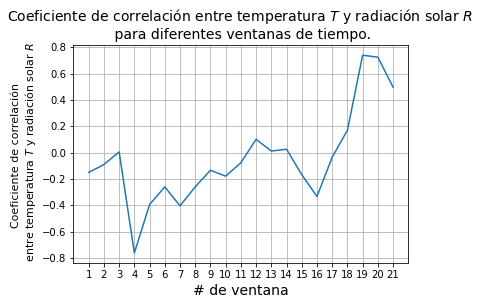

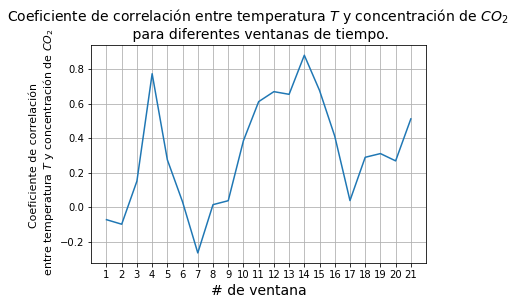

In [12]:
plt.plot(ventanas, ps_TR)
xticks = plt.xticks(np.arange(1, 22))
plt.grid()
plt.title('Coeficiente de correlación entre temperatura $T$ y radiación solar $R$ \n para diferentes ventanas de tiempo.', fontsize=14)
plt.xlabel('# de ventana', fontsize=14)
plt.ylabel('Coeficiente de correlación \n entre temperatura $T$ y radiación solar $R$', fontsize=11)


plt.figure()
plt.plot(ventanas, ps_TC)
xticks = plt.xticks(np.arange(1, 22))
plt.grid()
plt.title('Coeficiente de correlación entre temperatura $T$ y concentración de $CO_2$ \n para diferentes ventanas de tiempo.', fontsize=14)
plt.xlabel('# de ventana', fontsize=14)
plt.ylabel('Coeficiente de correlación \n entre temperatura $T$ y concentración de $CO_2$', fontsize=11)

## f) Basados en cada uno de los resultados obtenidos en a) - e), intente responder a la pregunta planteada inicialmente en este problema.

### Teniendo en cuenta que la comparación de variables **(temperatura, radiación solar)** nos muestra información sobre cómo cambia la temperatura del planeta en función de un proceso natural como es la radiación solar y que la comparación de variables **(temperatura, concentración de $CO_2$)** nos muestra información sobre cómo cambia la temperatura del planeta en funión de la intervención humana en forma de emisiones de dióxido de carbono, se puede afirmar con base en los datos obtenidos previamente que **es claro que el cambio climático se debe a la actividad humana y no al ciclo natural del sistema.**

### Esta afirmación se puede hacer en primera instancia porque para todos los años analizados se encontró un coeficiente de correlación entre la temperatura y la radiación solar muy cercano a cero, y cuando se desplazó la ventana de tiempo de 10 años no se obtuvo un resultado consistente, mostrando correlación negativa para algunas, cero para otras y positiva para otras. Mientras tanto, cuando se observó la correlación entre las variables de temperatura y concentración de $CO_2$ se encontró que hay una relación directamente proporcional entre las variables, dada por el coeficiente de correlación positivo, tanto para los 30 años analizados en primer lugar, como para el desplazamiento de la ventana de 10 años. De hecho, en esta última gráfica es claro que para la mayoría de las ventanas de tiempo utilizadas se obtuvo un coeficiente de correlación positivo, lo que respalda la gráfica encontrada en el literal c), en la que se veía una relación directamente proporcional entre las variables.